In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chaithanyakumar1449","key":"802350f8d02a46816383388246c23f52"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten


Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0
100% 4.75G/4.77G [01:11<00:00, 27.2MB/s]
100% 4.77G/4.77G [01:11<00:00, 72.0MB/s]


In [ ]:
!unzip fruit-and-vegetable-disease-healthy-vs-rotten.zip -d dataset


Streaming output truncated to the last 5000 lines.
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (85).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (86).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (87).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (88).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (89).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (9).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (90).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (91).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (92).jpg  
  inflating: dataset/Fruit And Vegetable Diseases Dataset/Potato__Healthy/fre

In [ ]:
import os

import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split

import shutil

from sklearn.model_selection import train_test_split

from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import Model

from keras.callbacks import EarlyStopping

from keras.optimizers import Adam

from tensorflow.keras.applications.resnet50 import ResNet50

from tensorflow.keras.layers import Dense, Flatten

from tensorflow.keras.models import Model

from keras.preprocessing import image

from keras.applications.vgg16 import preprocess_input

from tensorflow.keras.preprocessing.image import load_img, img_to_array

import random

from IPython.display import Image, display


In [ ]:
dataset_dir = 'dataset/Fruit And Vegetable Diseases Dataset'
classes=os.listdir(dataset_dir)


In [ ]:
import os

print(os.listdir("dataset"))
print(os.listdir("dataset/Fruit And Vegetable Diseases Dataset"))
print(classes)#Both classes and 2nd print statement are same

['Fruit And Vegetable Diseases Dataset']
['Apple__Rotten', 'Mango__Rotten', 'Grape__Healthy', 'Bellpepper__Healthy', 'Cucumber__Healthy', 'Mango__Healthy', 'Guava__Healthy', 'Bellpepper__Rotten', 'Tomato__Rotten', 'Jujube__Healthy', 'Strawberry__Rotten', 'Banana__Rotten', 'Potato__Rotten', 'Potato__Healthy', 'Jujube__Rotten', 'Carrot__Healthy', 'Strawberry__Healthy', 'Grape__Rotten', 'Orange__Rotten', 'Cucumber__Rotten', 'Tomato__Healthy', 'Banana__Healthy', 'Guava__Rotten', 'Pomegranate__Rotten', 'Orange__Healthy', 'Apple__Healthy', 'Pomegranate__Healthy', 'Carrot__Rotten']
['Apple__Rotten', 'Mango__Rotten', 'Grape__Healthy', 'Bellpepper__Healthy', 'Cucumber__Healthy', 'Mango__Healthy', 'Guava__Healthy', 'Bellpepper__Rotten', 'Tomato__Rotten', 'Jujube__Healthy', 'Strawberry__Rotten', 'Banana__Rotten', 'Potato__Rotten', 'Potato__Healthy', 'Jujube__Rotten', 'Carrot__Healthy', 'Strawberry__Healthy', 'Grape__Rotten', 'Orange__Rotten', 'Cucumber__Rotten', 'Tomato__Healthy', 'Banana__Health

In [ ]:
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)


In [ ]:
for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)


    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))

    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))

    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))



In [ ]:
    print("Dataset split into training, validation, and test sets.")



Dataset split into training, validation, and test sets.


In [ ]:
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

In [ ]:
IMG_SIZE = (224, 224)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

Found 3359 images belonging to 28 classes.


In [ ]:
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)


Found 1119 images belonging to 28 classes.


In [ ]:
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 1120 images belonging to 28 classes.


In [ ]:
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)


{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 

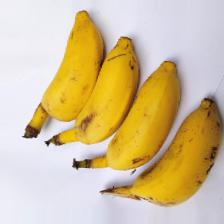

In [ ]:
folder_path = '/content/output_dataset/train/Banana__Healthy'

#List all files in the folder

image_files = [f for f in os.listdir (folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

# Select a random image from the list

selected_image = random.choice(image_files)

# Display the randomly selected image

image_path = os.path.join(folder_path, selected_image)

display(Image(filename=image_path))

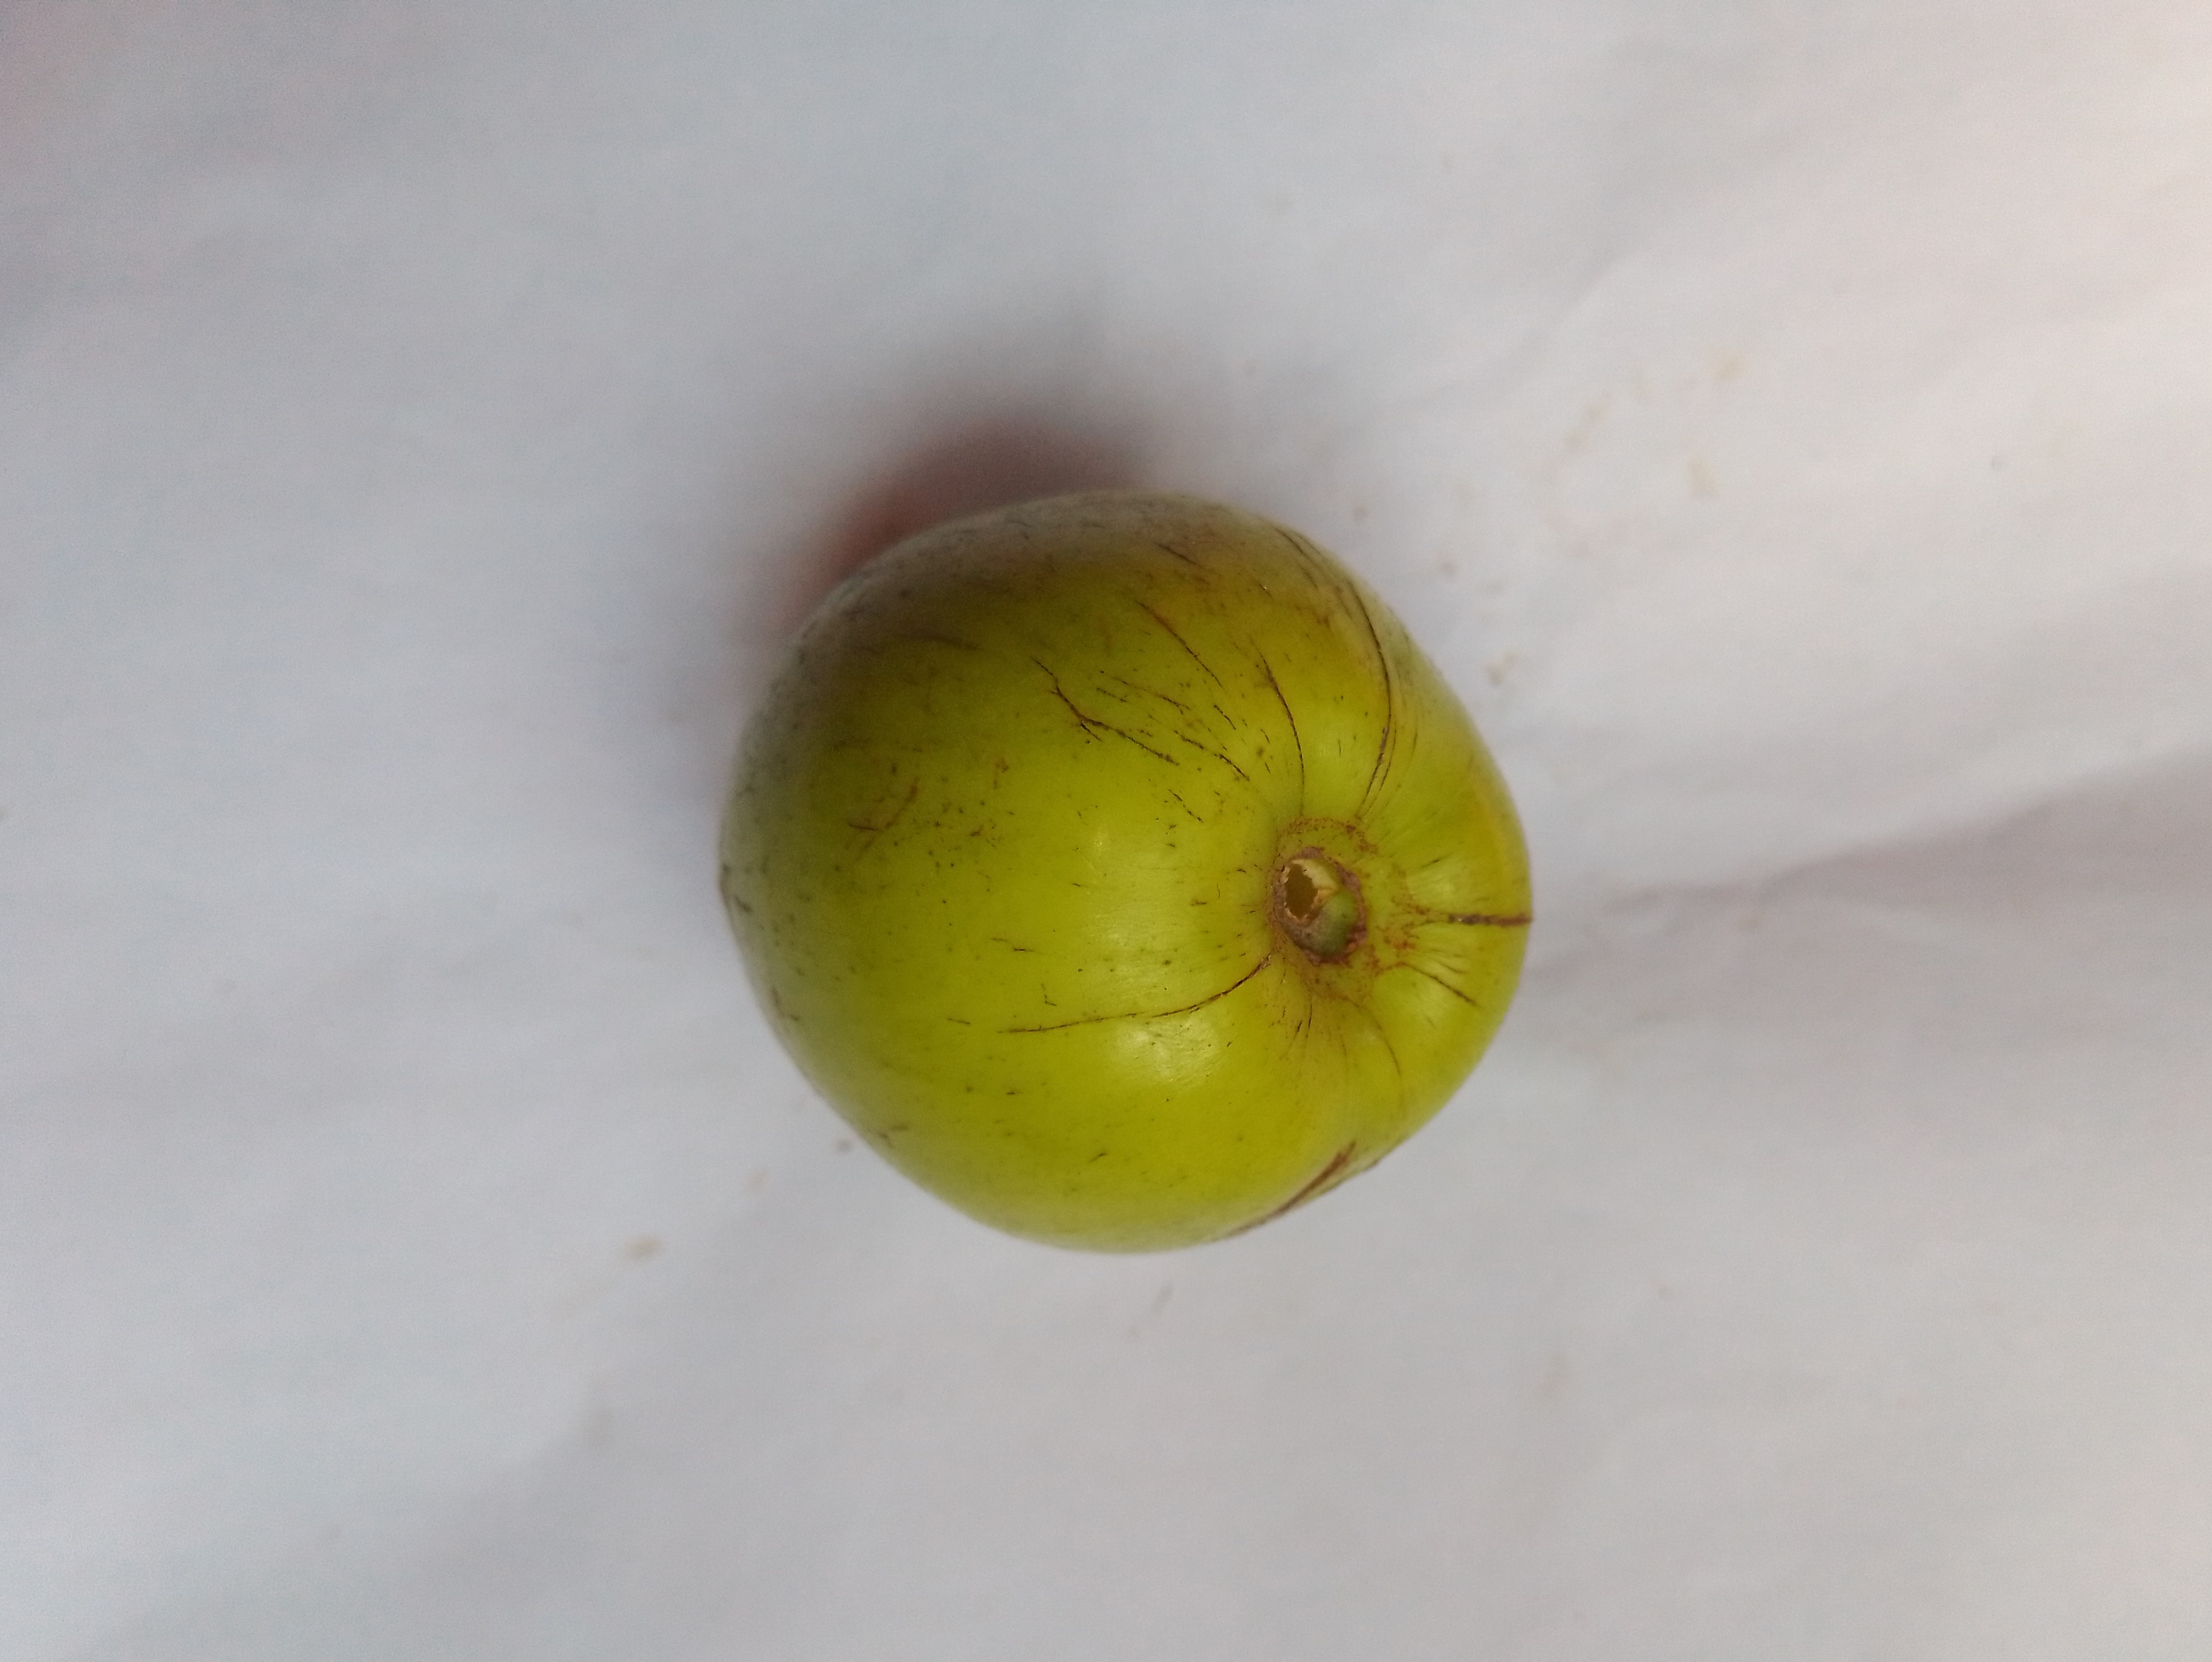

In [ ]:
folder_path = '/content/output_dataset/test/Jujube__Healthy'


#List all files in the folder

image_files = [f for f in os.listdir (folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

# Select a random image from the list

selected_image = random.choice(image_files)

# Display the randomly selected image

image_path = os.path.join(folder_path, selected_image)

display(Image(filename=image_path))

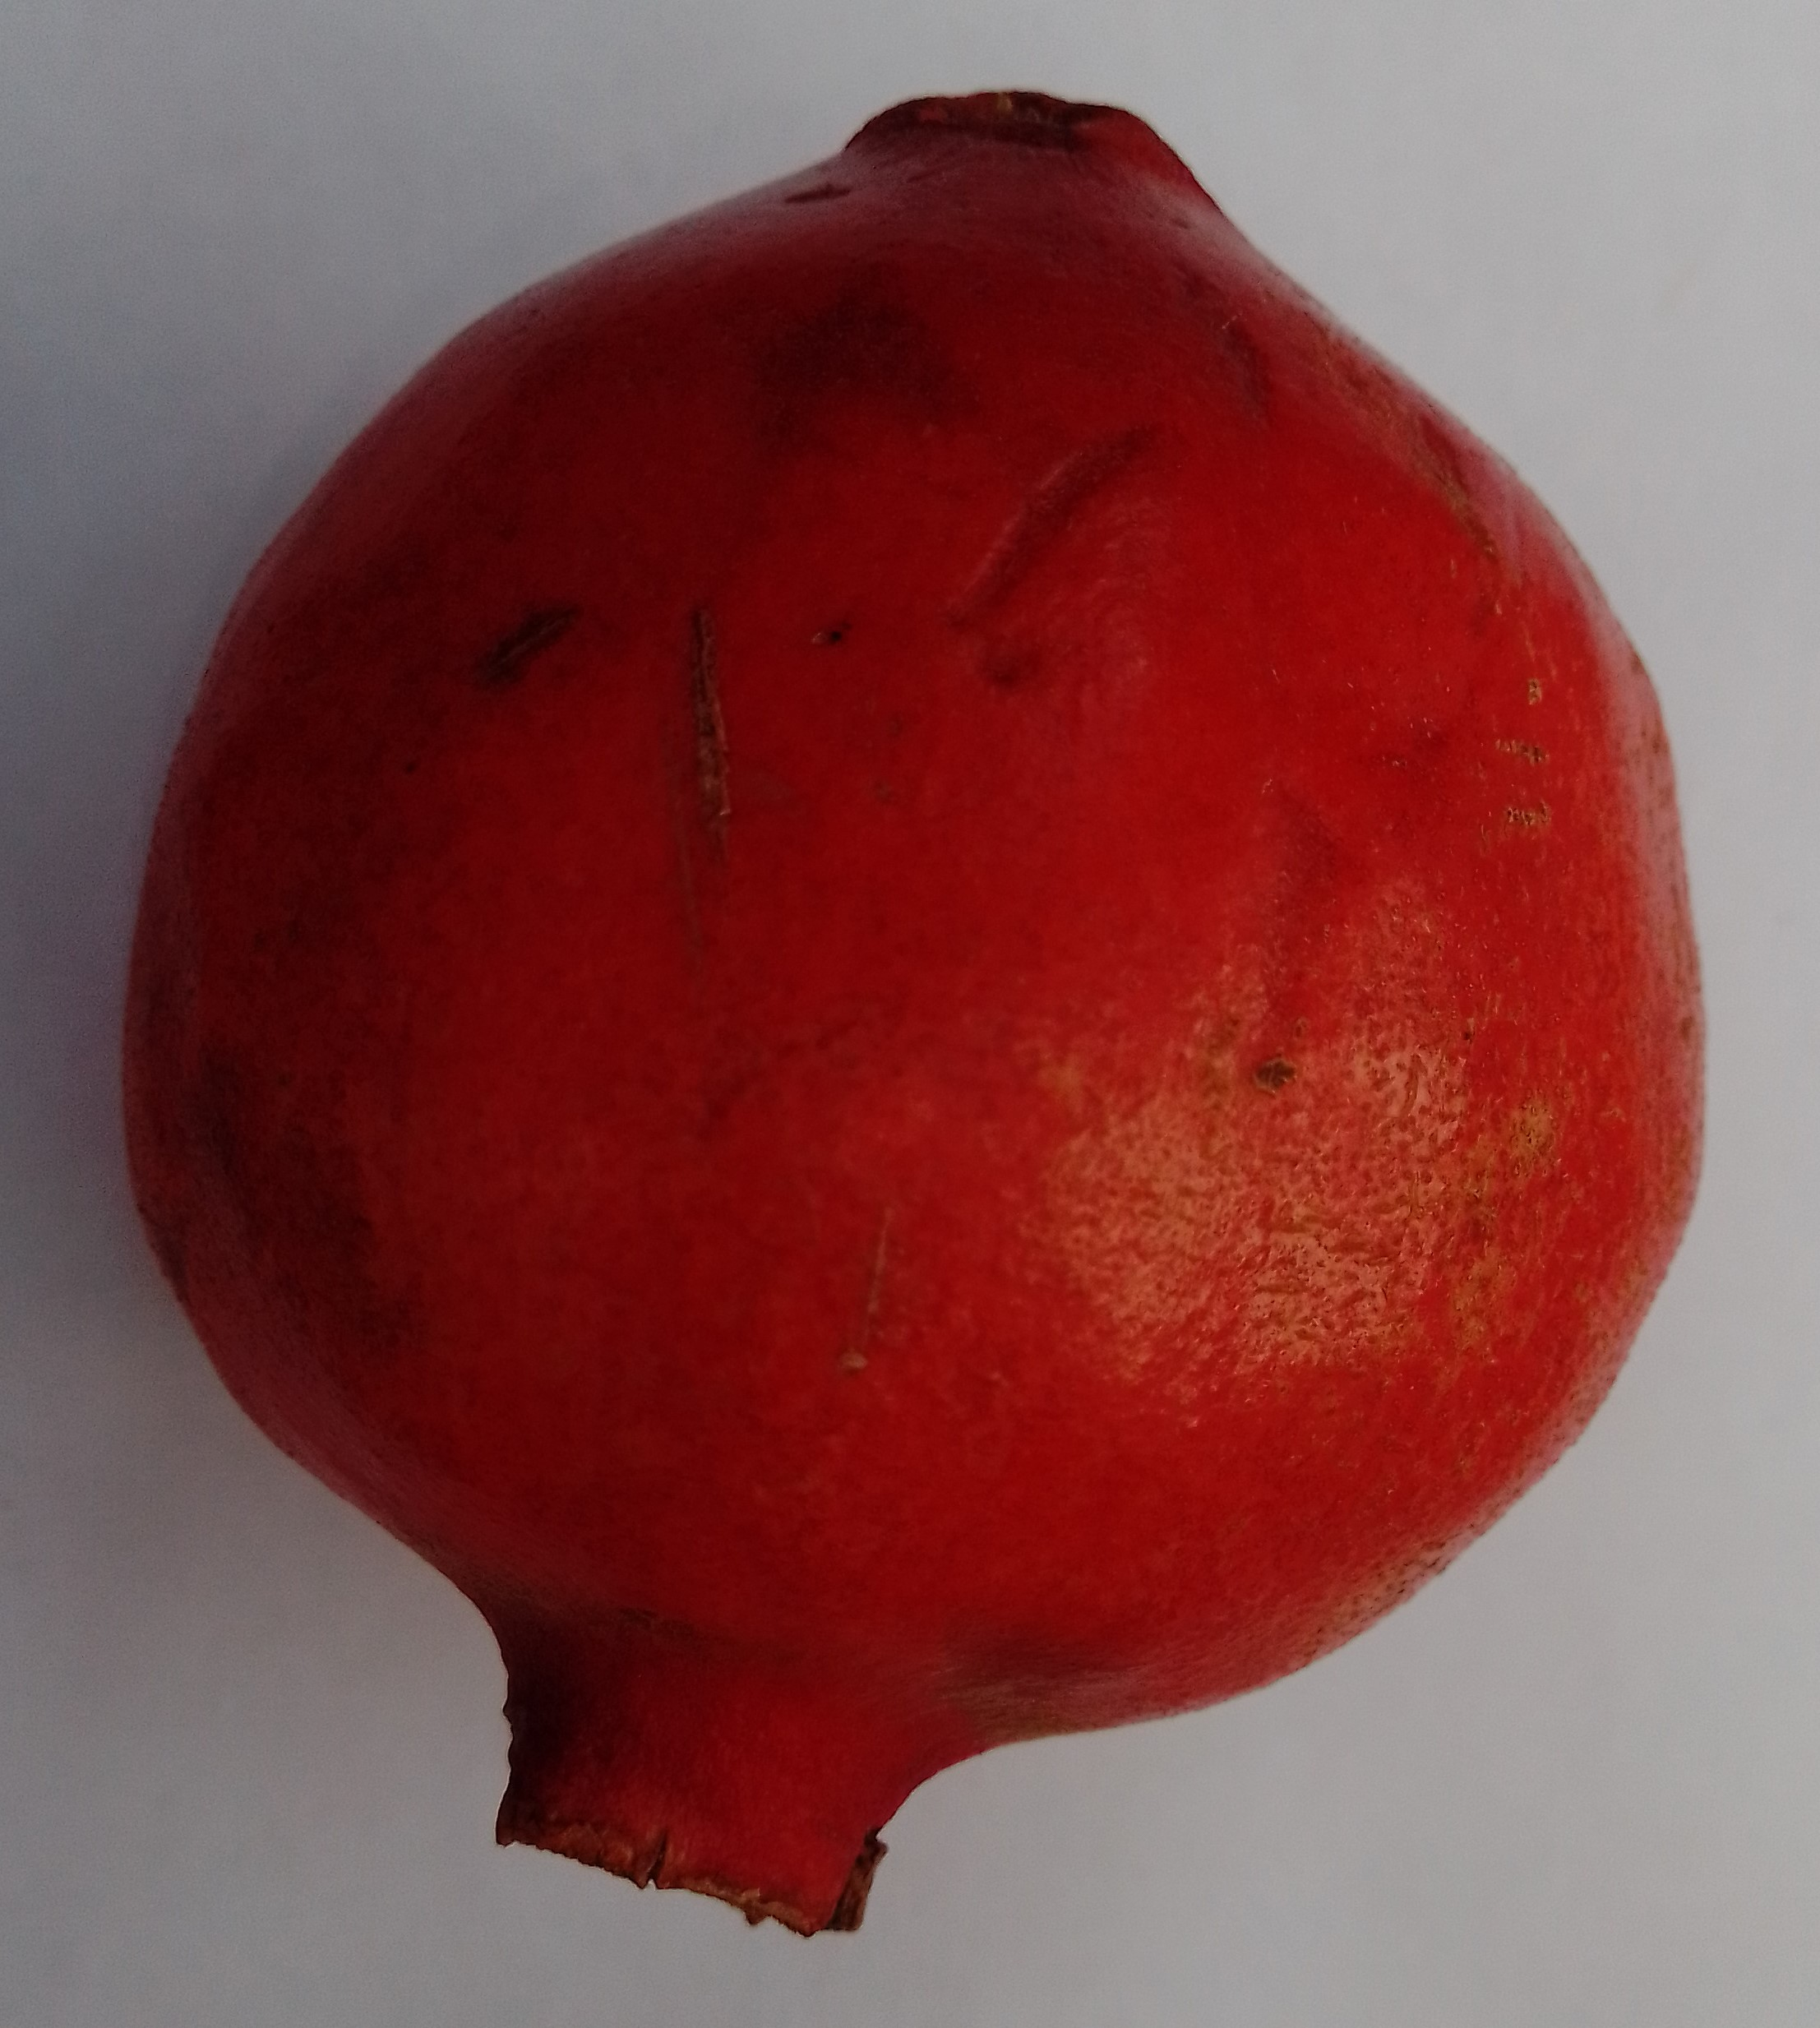

In [ ]:
folder_path = '/content/output_dataset/test/Pomegranate__Healthy'

#List all files in the folder

image_files = [f for f in os.listdir (folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

# Select a random image from the list

selected_image = random.choice(image_files)

# Display the randomly selected image

image_path = os.path.join(folder_path, selected_image)

display(Image(filename=image_path))

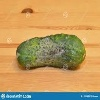

In [ ]:
folder_path = '/content/output_dataset/test/Cucumber__Rotten'


#List all files in the folder

image_files = [f for f in os.listdir (folder_path) if f.endswith(('.jpg','.png','.jpeg'))]

# Select a random image from the list

selected_image = random.choice(image_files)

# Display the randomly selected image

image_path = os.path.join(folder_path, selected_image)

display(Image(filename=image_path))

In [ ]:
trainpath = "/content/output_dataset/train"

testpath="/content/output_dataset/test"

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2, shear_range= 0.2)

test_datagen = ImageDataGenerator (rescale = 1./255)

train = train_datagen.flow_from_directory (trainpath, target_size = (224,224), batch_size = 20)

test = test_datagen.flow_from_directory(testpath, target_size = (224,224), batch_size = 20)

Found 3359 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.


In [ ]:
vgg=VGG16(include_top = False, input_shape=(224,224,3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
len(vgg.layers)

19

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
x=Flatten()(vgg.output)

In [ ]:
output=Dense(28,activation='softmax')(x)

In [ ]:
vgg16= Model(vgg.input,output)

In [ ]:
vgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
opt = Adam(learning_rate=0.0001)

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [ ]:
vgg16.compile(optimizer='adam' , loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history =vgg16.fit(train, validation_data=test, epochs=15, steps_per_epoch=20, callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.0956 - loss: 4.4878 - val_accuracy: 0.3536 - val_loss: 2.3113
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4129 - loss: 2.1585 - val_accuracy: 0.4839 - val_loss: 1.7316
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5683 - loss: 1.5466 - val_accuracy: 0.5991 - val_loss: 1.3975
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.6566 - loss: 1.2340

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6575 - loss: 1.2304 - val_accuracy: 0.5804 - val_loss: 1.4821
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6050 - loss: 1.6915 - val_accuracy: 0.6089 - val_loss: 1.3517
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6791 - loss: 0.9677 - val_accuracy: 0.6527 - val_loss: 1.2545
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7346 - loss: 0.9277 - val_accuracy: 0.6616 - val_loss: 1.2051
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.7062 - loss: 0.9541 - val_accuracy: 0.6848 - val_loss: 1.1853
Epoch 9/15
 8/20 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.7105 - loss: 1.0351

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 807ms/step - accuracy: 0.7192 - loss: 0.9887 - val_accuracy: 0.6812 - val_loss: 1.1812
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7669 - loss: 0.7056 - val_accuracy: 0.7259 - val_loss: 1.0056
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7896 - loss: 0.6606 - val_accuracy: 0.7580 - val_loss: 0.9899
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7893 - loss: 0.6642 - val_accuracy: 0.6857 - val_loss: 1.2119
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7902 - loss: 0.7453 - val_accuracy: 0.7339 - val_loss: 0.9857
Epoch 14/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.8325 - loss: 0.5173 - val_accuracy: 0.7580 - val_loss: 0.8938


In [ ]:
class_labels = train.class_indices
print(class_labels)
labels=dict((v,k) for k,v in class_labels.items())
print(labels)

{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{0: 'Apple__Healthy', 1: 'Apple__Rotten', 2: 'Banana__Healthy', 3: 'Banana__Rotten', 4: 'Bellpepper__Healthy', 5: 'Bellpepper__Rotten', 6: 'Carrot__Healthy', 7: 'Carrot__Rotten', 8: 'Cucumber__Healthy', 9: 'Cucumber__Rotten', 10: 'Grape__Healthy', 11: 'Grape__Rotten', 12: 'Guava__Healthy', 13: 'Guava__Rotten', 14: 'Jujube__Healthy', 15: 'Jujube__Rotten', 

In [ ]:
img_path = '/content/output_dataset/train/Bellpepper__Healthy/freshPepper (103).jpg'


In [ ]:
import numpy as np

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))

print(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]
Image is tested successfully. 
 Image belongs to  Bellpepper__Healthy class.


In [ ]:
img_path = '/content/output_dataset/train/Mango__Rotten/144.jpg'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


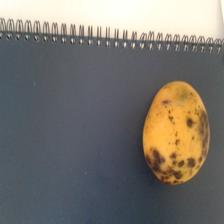

Image is tested successfully. 
 Image belongs to  Mango__Rotten class.


100.0

In [ ]:
import numpy as np

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
display(img)
print("Image is tested successfully. \n Image belongs to ",labels[np.argmax(preds)],"class.")
confidence = round(float(np.max(preds)) * 100, 2)
print(confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


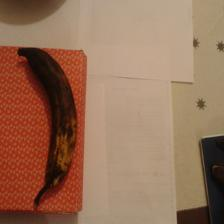

Predicted: Banana__Rotten
100.0


In [ ]:

# Pick random image
folder = '/content/output_dataset/val/Banana__Rotten'
img_name = random.choice(os.listdir(folder))
img_path = os.path.join(folder, img_name)

# Predict
img = load_img(img_path, target_size=(224, 224))
x = preprocess_input(img_to_array(img))
preds = vgg16.predict(np.array([x]))
predicted_class = labels[np.argmax(pred)]

# Display image and result
display(img)
print("Predicted:", predicted_class)
confidence = round(float(np.max(preds)) * 100, 2)
print(confidence)

In [ ]:
from google.colab import files
vgg16.save("vgg16_detector.h5")
files.download("vgg16_detector.h5")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.         0.03445399 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.965546   0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


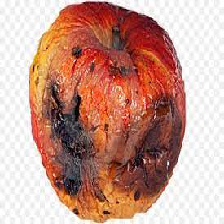

Image is tested successfully. 
 Image belongs to  Guava__Rotten class.


96.55

In [ ]:
img_path ='/content/apple_rotten1.jpeg'

import numpy as np

img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
print(preds)
display(img)
print("Image is tested successfully. \n Image belongs to ",labels[np.argmax(preds)],"class.")
confidence = round(float(np.max(preds)) * 100, 2)
print(confidence)
